随時更新

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb

plt.rcParams["font.size"] = 16
plt.rcParams["axes.axisbelow"] = True

### ベルヌーイ分布

#### 概要
確率 $\mu$ で成功, 確率 $1-\mu$ で失敗する試行を表現した分布. 確率変数 $x$ は成功の時 1, 失敗の時 0 をとるものとする.

#### 質量関数
$$
    p(x|\mu) = \mu^{x}(1-\mu)^{1-x}
$$

#### 期待値
$$
    \mathrm{E}[x] = \mu
$$

#### 分散
$$
    \mathrm{Var}[x] = \mu(1-\mu)
$$

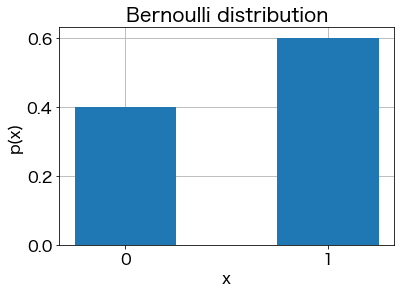

In [2]:
def bernoulli(x, mu):
    return mu**x * (1-mu)**(1-x)

x = np.array([0, 1])
p_x = bernoulli(x, mu=0.6)

plt.figure(figsize=(6, 4))
plt.bar(x.astype(str), p_x, width=0.5)
plt.title("Bernoulli distribution")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.show()

### 二項分布

#### 概要
ベルヌーイ試行を独立に $N$ 回行った時の, 成功回数の分布.

#### 質量関数
$$
    p(x|N,\mu) = \binom{N}{x}\mu^x(1-\mu)^{N-x}
$$

#### 期待値
$$
    \mathrm{E}[x] = N\mu
$$

#### 分散
$$
    \mathrm{Var}[x] = N\mu(1-\mu)
$$

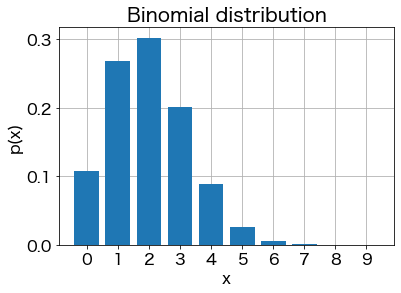

In [3]:
def binomial(x, N, mu):
    return np.array([comb(N, _x, exact=True)*(mu**_x)*(1-mu)**(N-_x) for _x in x])

x = np.array([i for i in range(10)])
p_x = binomial(x, N=10, mu=0.2)

plt.figure(figsize=(6, 4))
plt.bar(x.astype(str), p_x, width=0.8)
plt.title("Binomial distribution")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.show()